In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

c:\Users\fiar fly\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_attrition = pd.read_csv("HR Employee data.csv")
df_survey = pd.read_csv("Employee_office_survey.csv")
df_office = pd.read_csv("Office_codes.csv")
df_job_pos = pd.read_csv("Job_position_structure.csv")

In [3]:
df_survey = df_survey.rename(columns={'emp_id': 'EmployeeID', 'off_cde': 'office_code'})
df_job_pos = df_job_pos.rename(columns={'JobLevel': 'JobLevel_updated'})

In [4]:
df = df_attrition.merge(df_survey, on=['EmployeeID', 'office_code'], how='left')
df = df.merge(df_office, on='office_code', how='left')
df = df.merge(df_job_pos, on=['Department', 'JobLevel_updated'], how='left')

In [5]:
drop_cols = ['EmployeeNumber', 'StandardHours', 'Over18', 'EmployeeCount']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

In [6]:
df.fillna(-1, inplace=True)

In [7]:
label_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [8]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [12]:
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 1.0
Confusion Matrix:
 [[7665    0]
 [   0 1757]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7665
           1       1.00      1.00      1.00      1757

    accuracy                           1.00      9422
   macro avg       1.00      1.00      1.00      9422
weighted avg       1.00      1.00      1.00      9422



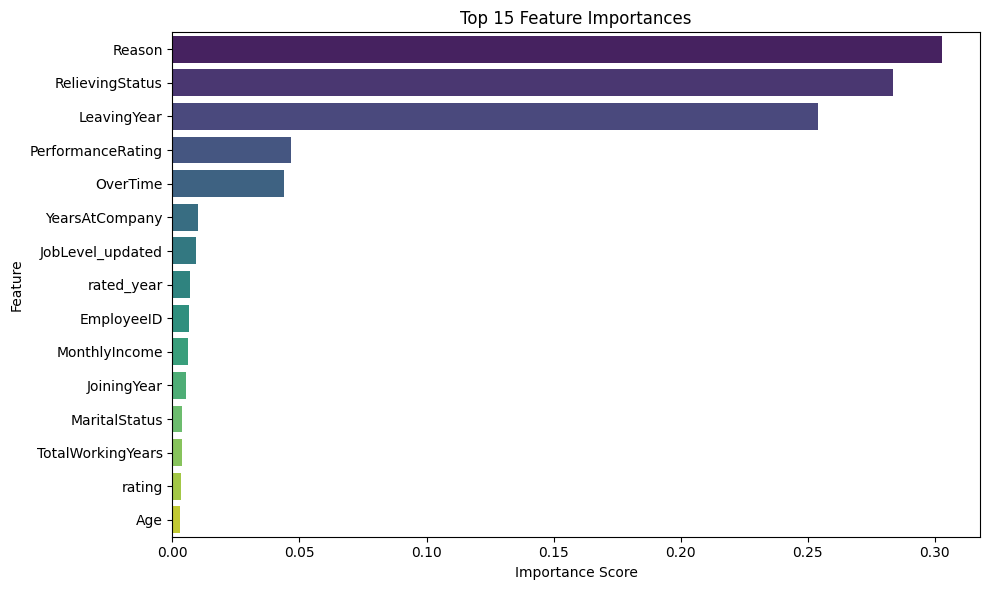

In [13]:
importances = pd.Series(best_model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [15]:
corr_df = df.copy()
corr_df['Attrition'] = y
correlations = corr_df.corr()['Attrition'].sort_values(ascending=False)
print("Top Correlated Features:\n", correlations.head(10))

Top Correlated Features:
 Attrition             1.000000
LeavingYear           1.000000
RelievingStatus       0.960409
Reason                0.880391
OverTime              0.463842
MaritalStatus         0.205461
PerformanceRating     0.146042
country               0.092703
NumCompaniesWorked    0.085660
DistanceFromHome      0.085265
Name: Attrition, dtype: float64


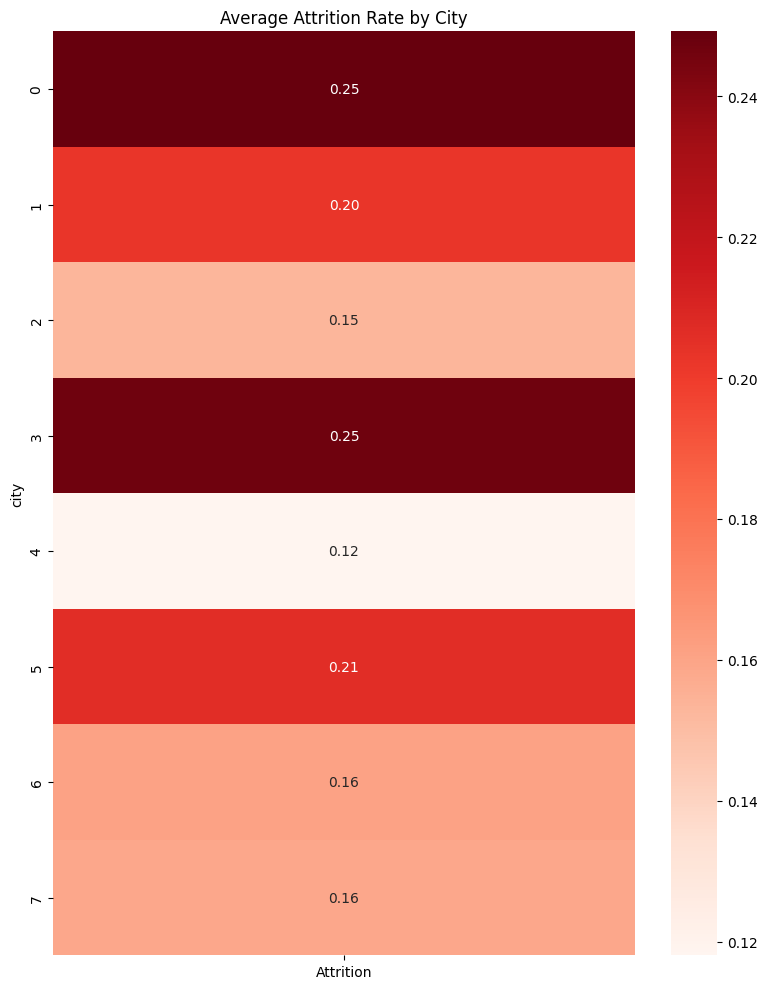

In [16]:
location_attrition = df.groupby(['city', 'province', 'country'])['Attrition'].mean().reset_index()
pivot = location_attrition.pivot_table(index='city', values='Attrition')

plt.figure(figsize=(8, 10))
sns.heatmap(pivot, cmap="Reds", annot=True, fmt=".2f")
plt.title("Average Attrition Rate by City")
plt.tight_layout()
plt.show()

SHAP values shape: [(40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2), (40, 2),

<Figure size 640x480 with 0 Axes>

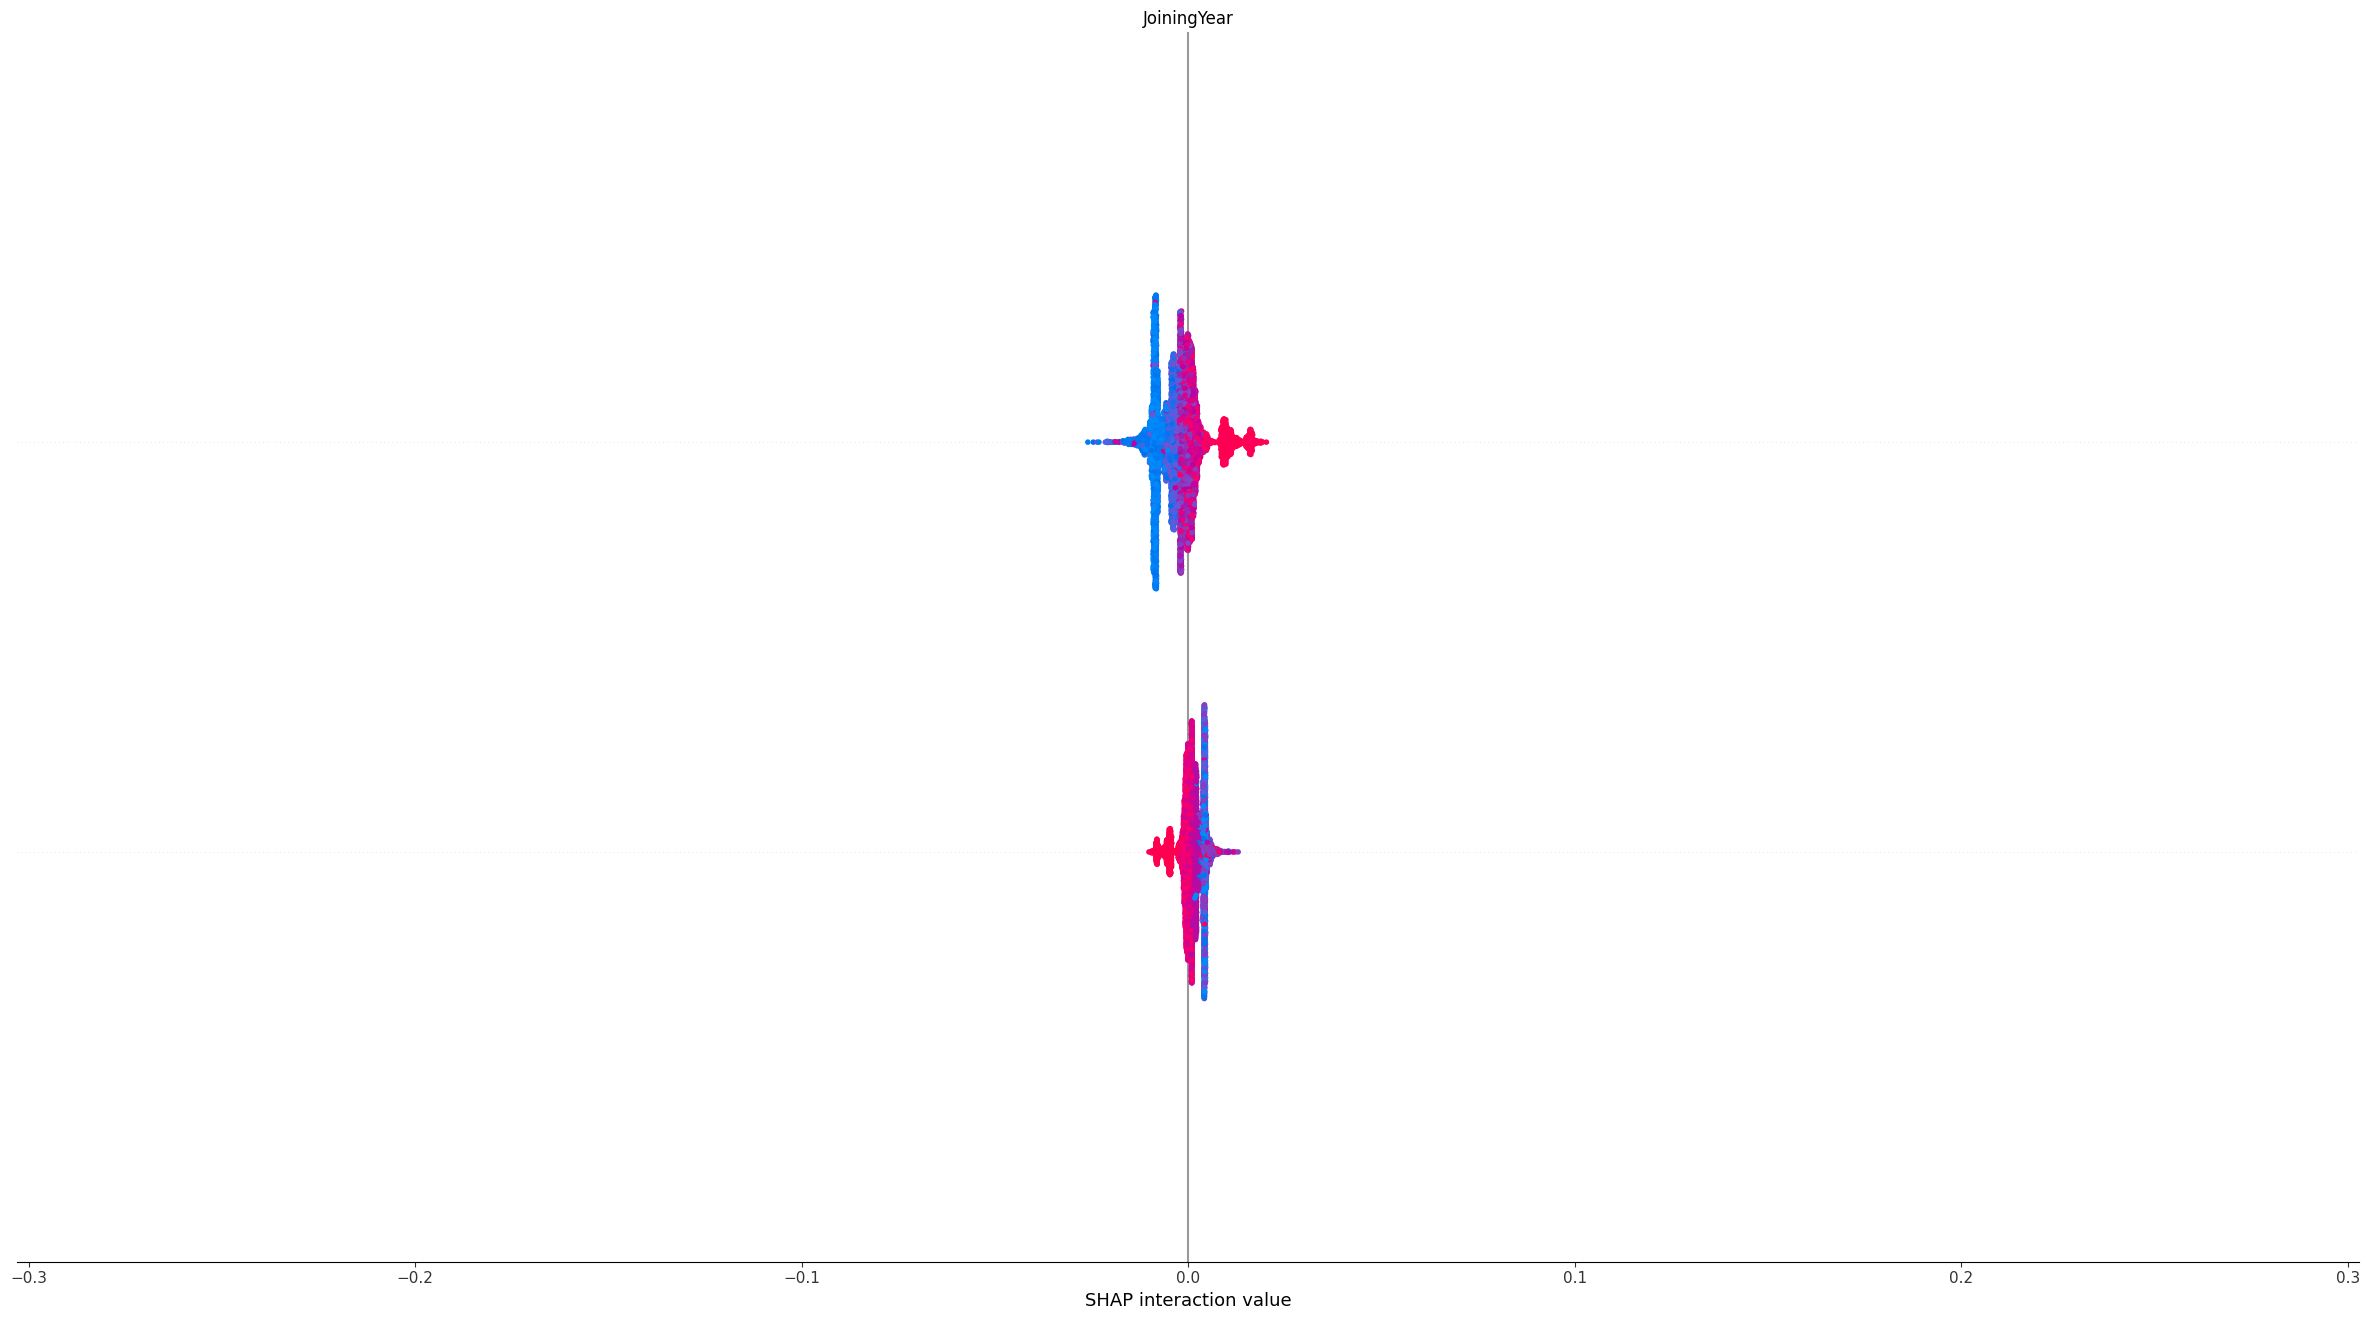

In [17]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

print("SHAP values shape:", [v.shape for v in shap_values])
if isinstance(shap_values, list):
    if len(shap_values) > 1:  

        shap_values_class_1 = shap_values[1]
    else:
        shap_values_class_1 = shap_values[0]
else:
    shap_values_class_1 = shap_values

if shap_values_class_1.shape[1] == X_test.shape[1]:
    shap.summary_plot(shap_values_class_1, X_test, plot_type="bar", max_display=15)
else:
    shap_values_class_1 = shap_values_class_1[:, :-1]
    shap.summary_plot(shap_values_class_1, X_test, plot_type="bar", max_display=15)

    shap.summary_plot(shap_values_class_1, X_test, max_display=15)  # Plot for class 1